In [2]:
conda install -c https://conda.anaconda.org/anaconda pandas-datareader

Solving environment: ...working... done

# All requested packages already installed.


Note: you may need to restart the kernel to use updated packages.


In [3]:
import pandas as pd
import datetime
import pandas_datareader.data as web
import numpy as np
import math
import sklearn
from sklearn import preprocessing

In [4]:
start=datetime.datetime(2019,7,1)
end=datetime.datetime(2021,2,12)
df=web.DataReader("DOYU","yahoo",start,end) #extract the data from yahoo. the stock of Douyu international 2019 to 2021

In [5]:
df.head() # First 5 rows of database

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2019-07-17,11.54,11.00,11.02,11.50,32588500,11.50
2019-07-18,11.88,11.00,11.59,11.05,9060700,11.05
2019-07-19,11.16,10.10,10.93,10.50,6048300,10.50
2019-07-22,10.51,9.63,10.50,10.05,5289300,10.05
2019-07-23,10.50,9.90,10.00,10.38,2765700,10.38


In [6]:
df.tail() # Last 5 rows of database

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2021-02-08,14.710000,13.455,14.700000,13.720000,4306800,13.720000
2021-02-09,14.075000,13.695,13.790000,14.030000,3454700,14.030000
2021-02-10,15.270000,13.940,14.170000,14.910000,4897500,14.910000
2021-02-11,18.469999,14.810,14.890000,17.200001,19203600,17.200001
2021-02-12,18.940001,16.600,17.184999,18.719999,6320900,18.719999


In [7]:
close_px=df['Adj Close']
mavg=close_px.rolling(window=7).mean()

In [8]:
mavg  #calculate the moving average price

Date
2019-07-17          NaN
2019-07-18          NaN
2019-07-19          NaN
2019-07-22          NaN
2019-07-23          NaN
                ...    
2021-02-08    13.720000
2021-02-09    13.848572
2021-02-10    14.050000
2021-02-11    14.565714
2021-02-12    15.298571
Name: Adj Close, Length: 399, dtype: float64

In [9]:
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import style
import matplotlib as mpl

In [10]:
mpl.rc('figure',figsize=(8,7))

In [11]:
mpl.__version__

'3.3.2'

According to the scatter plot showing, DOYU stock price is get higher on 2020-9, also the close price is almost equal the mean of moving price.

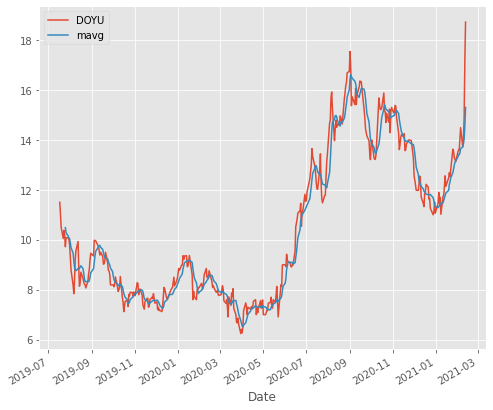

In [12]:
style.use('ggplot')
close_px.plot(label='DOYU')
mavg.plot(label = 'mavg')
plt.legend()  #DOYU mavg is moving avg price. the relationship of plot is showing the mavg and real price of stock. According to the plot to buy in and sell out.Also, we can see the mse is really small.

Return Deviation

Rt=Pt-P(t-1)/P(t-1)= Pt/P(t-1) -1 

According to the graph showing. DOYU stock is really fluctuation. 
The stock price has repeated high and low frequency fluctuations in the short term like a moth or couple days.
DOYU is not conducive to long-term holding, and is suitable for short-term trading.
At the same time, due to the high frequency of fluctuations, it is more necessary to choose and buy carefully when buying and selling

<AxesSubplot:xlabel='Date'>

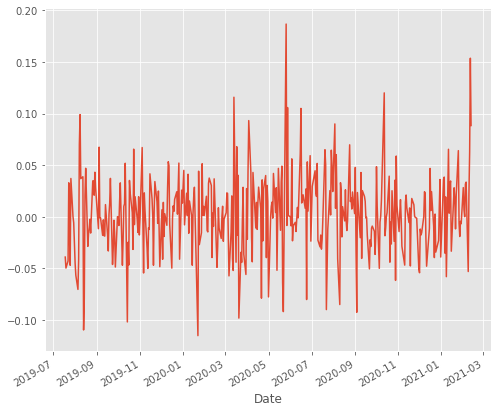

In [14]:
rd=close_px / close_px.shift(1) - 1
rd.plot(label='return') # logitical, the DOYU stock is not stable to hold. it is risk, the stock created on 2019-07. the fluctuate is higher. the worest reduciton is 10%,after two months could be going up to 10%, then drop rapidly.

In [15]:
pip install mplfinance

Note: you may need to restart the kernel to use updated packages.


In [16]:
import mplfinance
from matplotlib.dates import DateFormatter,WeekdayLocator,DayLocator,MONDAY

In [17]:
dfcomp = web.DataReader(['DOYU','HUYA','BILI'],'yahoo',start=start,end=end)['Adj Close'] #extract other stocks like HUYA and BILI, which are competitors with DOYU

In [18]:
dfcomp.head() 

Symbols,DOYU,HUYA,BILI
Date,,,
2019-07-01,NaN,25.629999,16.480000
2019-07-02,NaN,25.959999,16.610001
2019-07-03,NaN,25.920000,16.629999
2019-07-05,NaN,25.990000,16.740000
2019-07-08,NaN,24.889999,16.559999


In [19]:
retscomp=dfcomp.pct_change()
corr=retscomp.corr() # bulid up the correlation

Text(0, 0.5, 'Returns BILI')

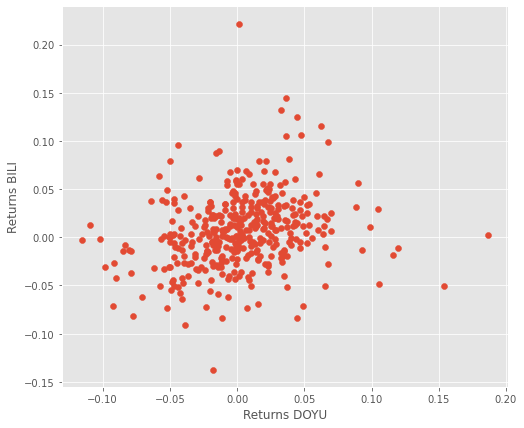

In [20]:
plt.scatter(retscomp.DOYU,retscomp.BILI)
plt.xlabel('Returns DOYU')
plt.ylabel('Returns BILI')
# plot showing, The relastion of DOYU and Bilibili are bit postive linear relationship. At the middle, as increasing of audiences, both stocks are raise, but at the end, they have competitive relationship.

array([[<AxesSubplot:xlabel='DOYU', ylabel='DOYU'>,
        <AxesSubplot:xlabel='HUYA', ylabel='DOYU'>,
        <AxesSubplot:xlabel='BILI', ylabel='DOYU'>],
       [<AxesSubplot:xlabel='DOYU', ylabel='HUYA'>,
        <AxesSubplot:xlabel='HUYA', ylabel='HUYA'>,
        <AxesSubplot:xlabel='BILI', ylabel='HUYA'>],
       [<AxesSubplot:xlabel='DOYU', ylabel='BILI'>,
        <AxesSubplot:xlabel='HUYA', ylabel='BILI'>,
        <AxesSubplot:xlabel='BILI', ylabel='BILI'>]], dtype=object)

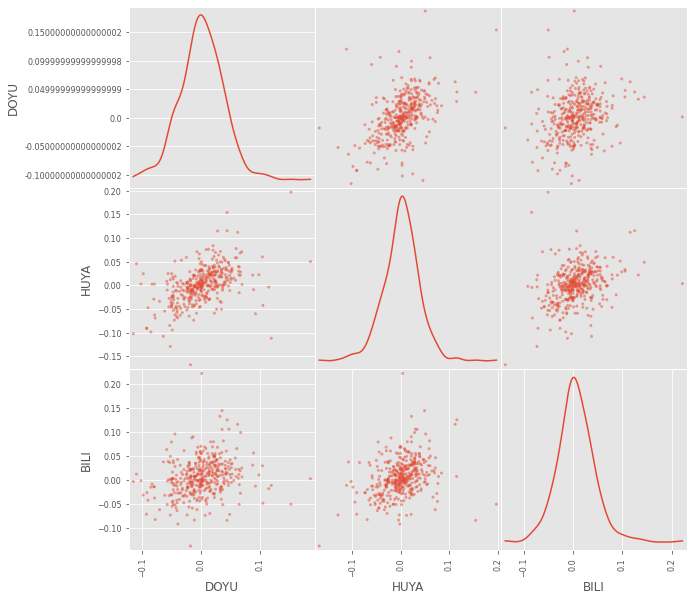

In [21]:
from pandas.plotting import scatter_matrix
scatter_matrix(retscomp,diagonal='kde',figsize=(10,10)) # The relation of different channel is almost same. Seems only BILI is contrary side with DOYU and HUYA

([<matplotlib.axis.YTick at 0x18de38d74f0>,
 [Text(0, 0, 'DOYU'), Text(0, 1, 'HUYA'), Text(0, 2, 'BILI')])

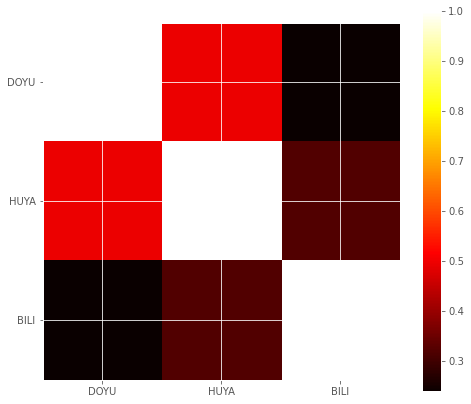

In [22]:
plt.imshow(corr,cmap='hot',interpolation='none')
plt.colorbar()
plt.xticks(range(len(corr)),corr.columns)
plt.yticks(range(len(corr)),corr.columns) #The heat map shows the DOYU and HUYA have a positive relationship. According to News, they have a partnership(mergin)

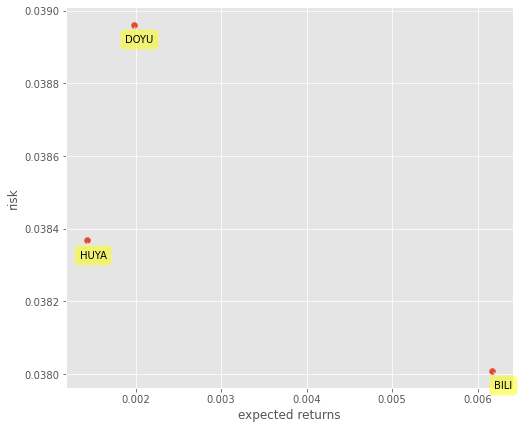

In [23]:
plt.scatter(retscomp.mean(),retscomp.std())
plt.xlabel('expected returns')
plt.ylabel('risk')
for label,x,y in zip(retscomp.columns,retscomp.mean(),retscomp.std()):
    plt.annotate(label,xy=(x,y),xytext=(20, -20),
    textcoords='offset points',ha='right',va='bottom',
                 bbox = dict(boxstyle = 'round,pad=0.5', fc = 'yellow', alpha=0.5),
                arrowprops=dict(arrowstyle = '->',connectionstyle='arc3,rad=0')) #dependent on the plot showing, BILI is one stable stock, and Hihger expected returns than others. DOYU even current raise 20% on Feb, but it also accompany higher risk. Huya is not recommendation at current time.

Model Calculation

In [24]:
dfreg=df.loc[:,['Adj Close','Volume']]
dfreg.head()

,Adj Close,Volume
Date,,
2019-07-17,11.50,32588500
2019-07-18,11.05,9060700
2019-07-19,10.50,6048300
2019-07-22,10.05,5289300
2019-07-23,10.38,2765700


In [25]:
dfreg['HL_PCT'] = (df['High'] - df['Low'])/df['Close']*100.0
dfreg['PCT_change'] = (df['Close'] - df['Open']) / df['Open']*100.0

In [26]:
dfreg.head()

,Adj Close,Volume,HL_PCT,PCT_change
Date,,,,
2019-07-17,11.50,32588500,4.695652,4.355713
2019-07-18,11.05,9060700,7.963802,-4.659189
2019-07-19,10.50,6048300,10.095233,-3.934129
2019-07-22,10.05,5289300,8.756220,-4.285712
2019-07-23,10.38,2765700,5.780350,3.800001


In [27]:
dfreg.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 399 entries, 2019-07-17 to 2021-02-12
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Adj Close   399 non-null    float64
 1   Volume      399 non-null    int64  
 2   HL_PCT      399 non-null    float64
 3   PCT_change  399 non-null    float64
dtypes: float64(3), int64(1)
memory usage: 15.6 KB


In [28]:
forecast_out = int(math.ceil(0.01*len(dfreg)))
forecast_col = 'Adj Close'
dfreg['label'] = dfreg[forecast_col].shift(-forecast_out)
x = np.array (dfreg.drop(['label'],1))
x=preprocessing.scale(x)
x_lately=x[-forecast_out:]
x=x[:-forecast_out]
y=np.array(dfreg['label'])
y=y[:-forecast_out]

In [29]:
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.datasets import load_iris
from sklearn.svm import SVC
from sklearn import svm

In [30]:
x_train = x[:70]
y_train = y[:70]

x_test = x[70:]
y_test = y[70:]

In [31]:
clfreg = LinearRegression(n_jobs=-1)
clfreg.fit(x_train, y_train)

clfpoly2 = make_pipeline(PolynomialFeatures(2), Ridge())
clfpoly2.fit(x_train, y_train)

clfpoly3 = make_pipeline(PolynomialFeatures(3), Ridge())
clfpoly3.fit(x_train, y_train)

Pipeline(steps=[('polynomialfeatures', PolynomialFeatures(degree=3)),
                ('ridge', Ridge())])

In [32]:
clfknn = KNeighborsRegressor(n_neighbors=2)
clfknn.fit(x_train, y_train)

KNeighborsRegressor(n_neighbors=2)

In [33]:
confidencereg = clfreg.score(x_test, y_test)
confidencepoly2 = clfpoly2.score(x_test,y_test)
confidencepoly3 = clfpoly3.score(x_test,y_test)
confidenceknn = clfknn.score(x_test, y_test)

In [34]:
confidencereg 

0.6807893413308194

In [35]:
confidencepoly2

-0.21438705305581296

In [36]:
confidencepoly3

-0.14115214291821787

In [37]:
confidenceknn  # After multiple model calculating, only the linear regression has precisive evoluation 0.68. Other all is negative values. That means the DOYU stock is not a safe stock. we still need to consider more angel with time series.

-0.14860463920919686

In [38]:
df.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2019-07-17,11.54,11.00,11.02,11.50,32588500,11.50
2019-07-18,11.88,11.00,11.59,11.05,9060700,11.05
2019-07-19,11.16,10.10,10.93,10.50,6048300,10.50
2019-07-22,10.51,9.63,10.50,10.05,5289300,10.05
2019-07-23,10.50,9.90,10.00,10.38,2765700,10.38


In [43]:
df['Change'] = df['Open']-df['Close']
df['Range'] = df['High'] - df['Low']
df.head()

,High,Low,Open,Close,Volume,Adj Close,Change,Range
Date,,,,,,,,
2019-07-17,11.54,11.00,11.02,11.50,32588500,11.50,-0.48,0.540000
2019-07-18,11.88,11.00,11.59,11.05,9060700,11.05,0.54,0.880000
2019-07-19,11.16,10.10,10.93,10.50,6048300,10.50,0.43,1.059999
2019-07-22,10.51,9.63,10.50,10.05,5289300,10.05,0.45,0.880000
2019-07-23,10.50,9.90,10.00,10.38,2765700,10.38,-0.38,0.600000


In [44]:
doyu_corr = df[['Close','Change','Volume','Range']]
cov =np.corrcoef(doyu_corr.T)
cov

array([[ 1.        , -0.05776854,  0.340095  ,  0.438762  ],
       [-0.05776854,  1.        , -0.00818845,  0.09025228],
       [ 0.340095  , -0.00818845,  1.        ,  0.47643615],
       [ 0.438762  ,  0.09025228,  0.47643615,  1.        ]])

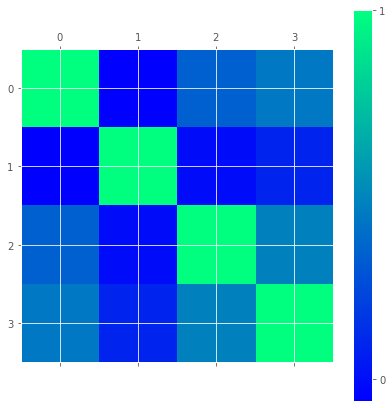

In [45]:
heat_map=plt.matshow(cov,cmap=plt.cm.winter)
plt.colorbar(heat_map,ticks= [-1,0,1])
plt.show() # The matrix heat map showing Price Change and Price Range has correlation, but not obviously

<AxesSubplot:xlabel='Date'>

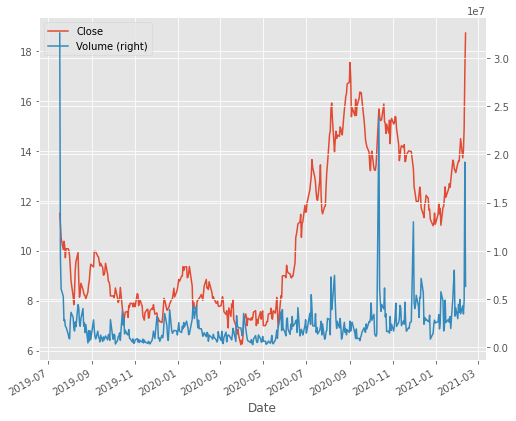

In [42]:
df[['Close','Volume']].plot(secondary_y = 'Volume',grid=True) # At most time, when DOYU price going up, the volumn is not too much. However, when Price go down, the volumn is bit raise. The volumn cannot take the price go up.